In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
file_path = 'Titanic-Dataset.csv'
titanic_df = pd.read_csv('/content/archive.zip')

In [13]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [15]:

titanic_df.shape

(891, 12)

In [17]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())

In [22]:
dup = titanic_df.duplicated().sum()
print("The number of duplicated values in the dataset are: ", dup)

The number of duplicated values in the dataset are:  0


In [23]:
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

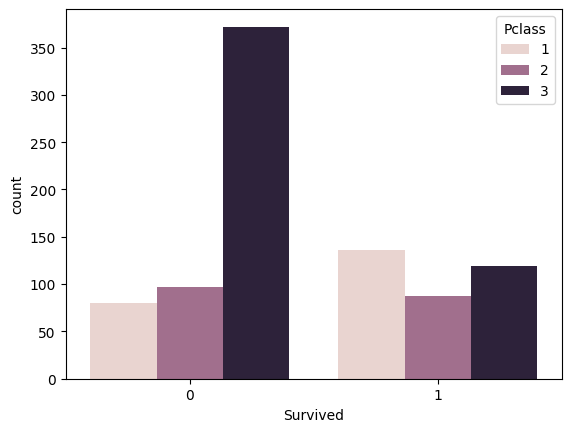

In [24]:
sns.countplot(x=titanic_df['Survived'], hue=titanic_df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

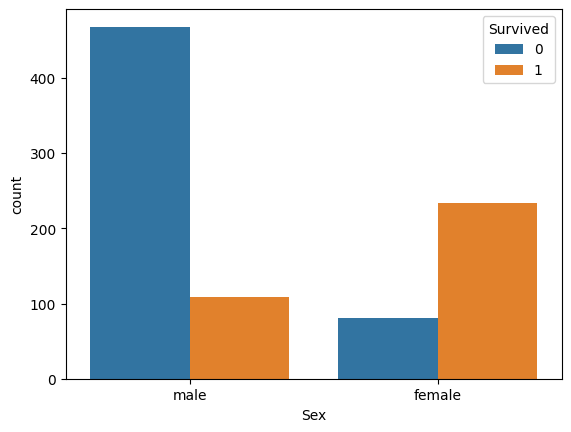

In [25]:
sns.countplot(x=titanic_df['Sex'], hue=titanic_df['Survived'])

In [26]:
titanic_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Pclass', ylabel='count'>

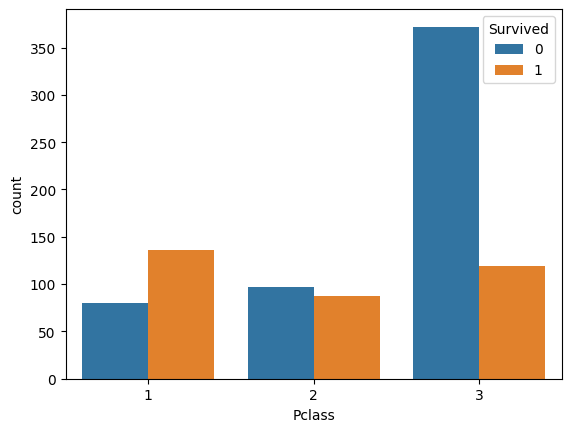

In [27]:
sns.countplot(x="Pclass",hue="Survived",data=titanic_df)

<ipython-input-28-09a0e0828ab0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=titanic_df['Survived'], palette='RdBu')


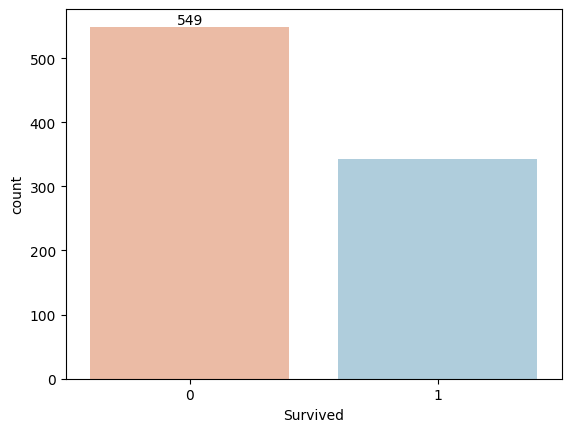

In [28]:
ax = sns.countplot(x=titanic_df['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

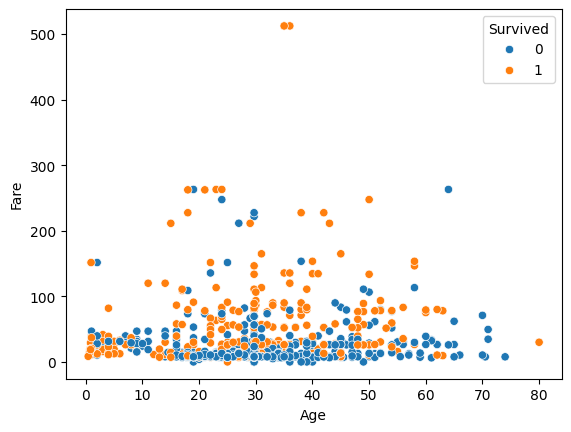

In [29]:
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.show()

In [30]:
df_update = titanic_df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [31]:
# Replace 'male' with 1 and 'female' with 0 in the 'Sex' column

df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
# Replace 'Q' with 0, 'S' with 1, and 'C' with 2 in the 'Embarked' column

df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,1.0
1,1,1,0,38.0,1,0,71.2833,C85,2.0
2,1,3,0,26.0,0,0,7.9250,NaN,1.0
3,1,1,0,35.0,1,0,53.1000,C123,1.0
4,0,3,1,35.0,0,0,8.0500,NaN,1.0


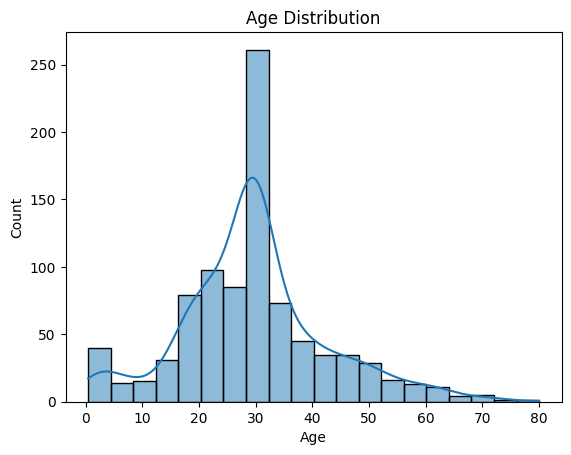

In [32]:
sns.histplot(data=titanic_df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

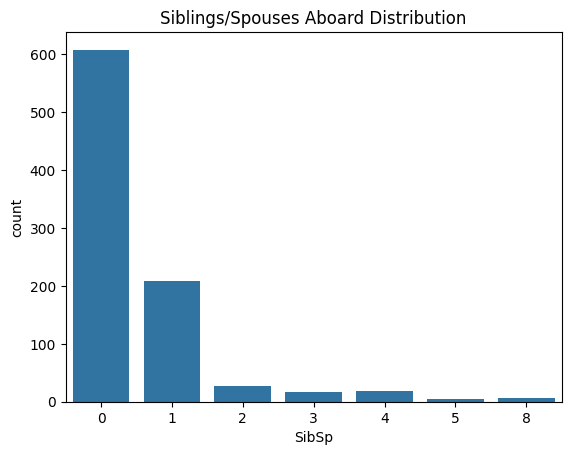

In [33]:
sns.countplot(data=titanic_df, x='SibSp')
plt.title('Siblings/Spouses Aboard Distribution')
plt.show()

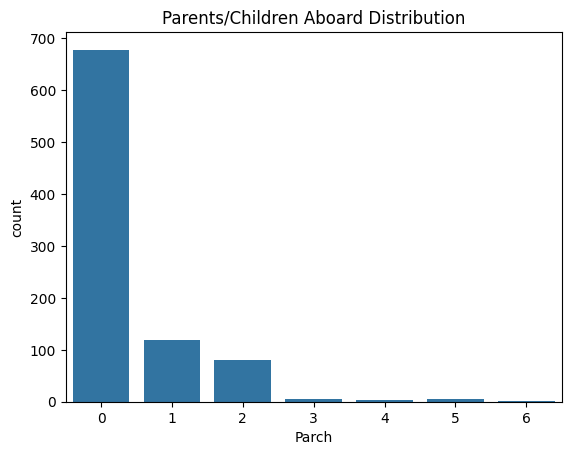

In [34]:
sns.countplot(data=titanic_df, x='Parch')
plt.title('Parents/Children Aboard Distribution')
plt.show()

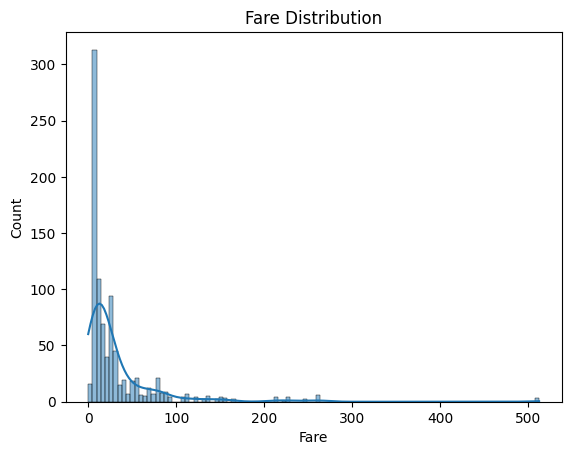

In [35]:
sns.histplot(data=titanic_df, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.show()

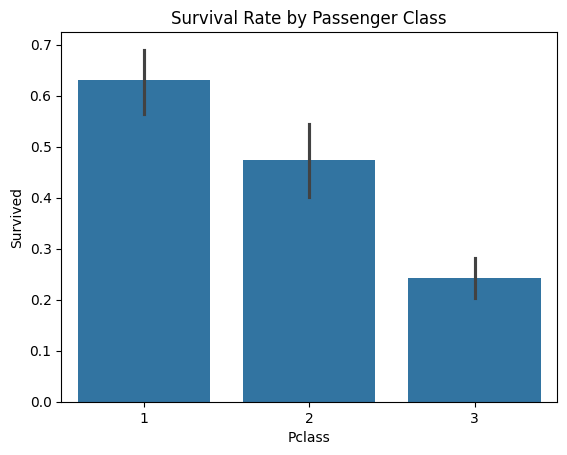

In [36]:
sns.barplot(data=titanic_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

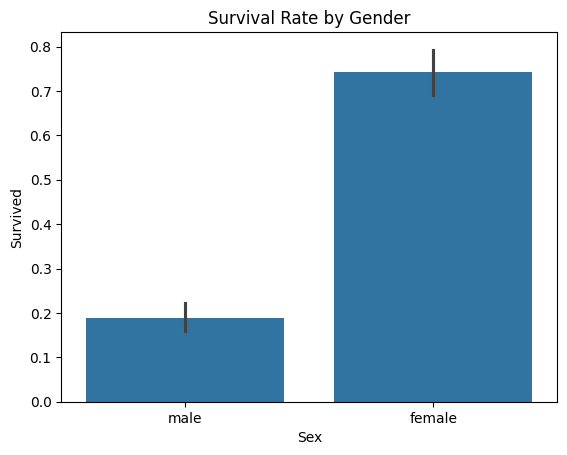

In [37]:
sns.barplot(data=titanic_df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

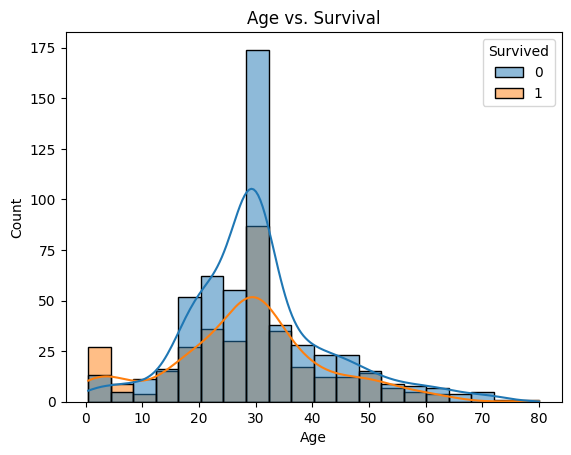

In [38]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Age vs. Survival')
plt.show()

In [39]:
round(titanic_df['Survived'].value_counts(normalize=True)*100, 2)

,proportion
Survived,
0,61.62
1,38.38
